# Making Umap-Mammoths


In [1]:
import pandas as pd
import numpy as np
import umap
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
#For Tables:
from IPython.display import display
from IPython.display import Latex
pd.set_option('display.max_columns', 500)
from tqdm import tnrange, tqdm_notebook
%load_ext rpy2.ipython


In [2]:
mammoth = pd.read_csv('mammoth.csv')

In [3]:
print(len(mammoth))
mammoth2 = mammoth.sample(50000)
del mammoth
mammoth = mammoth2

999778


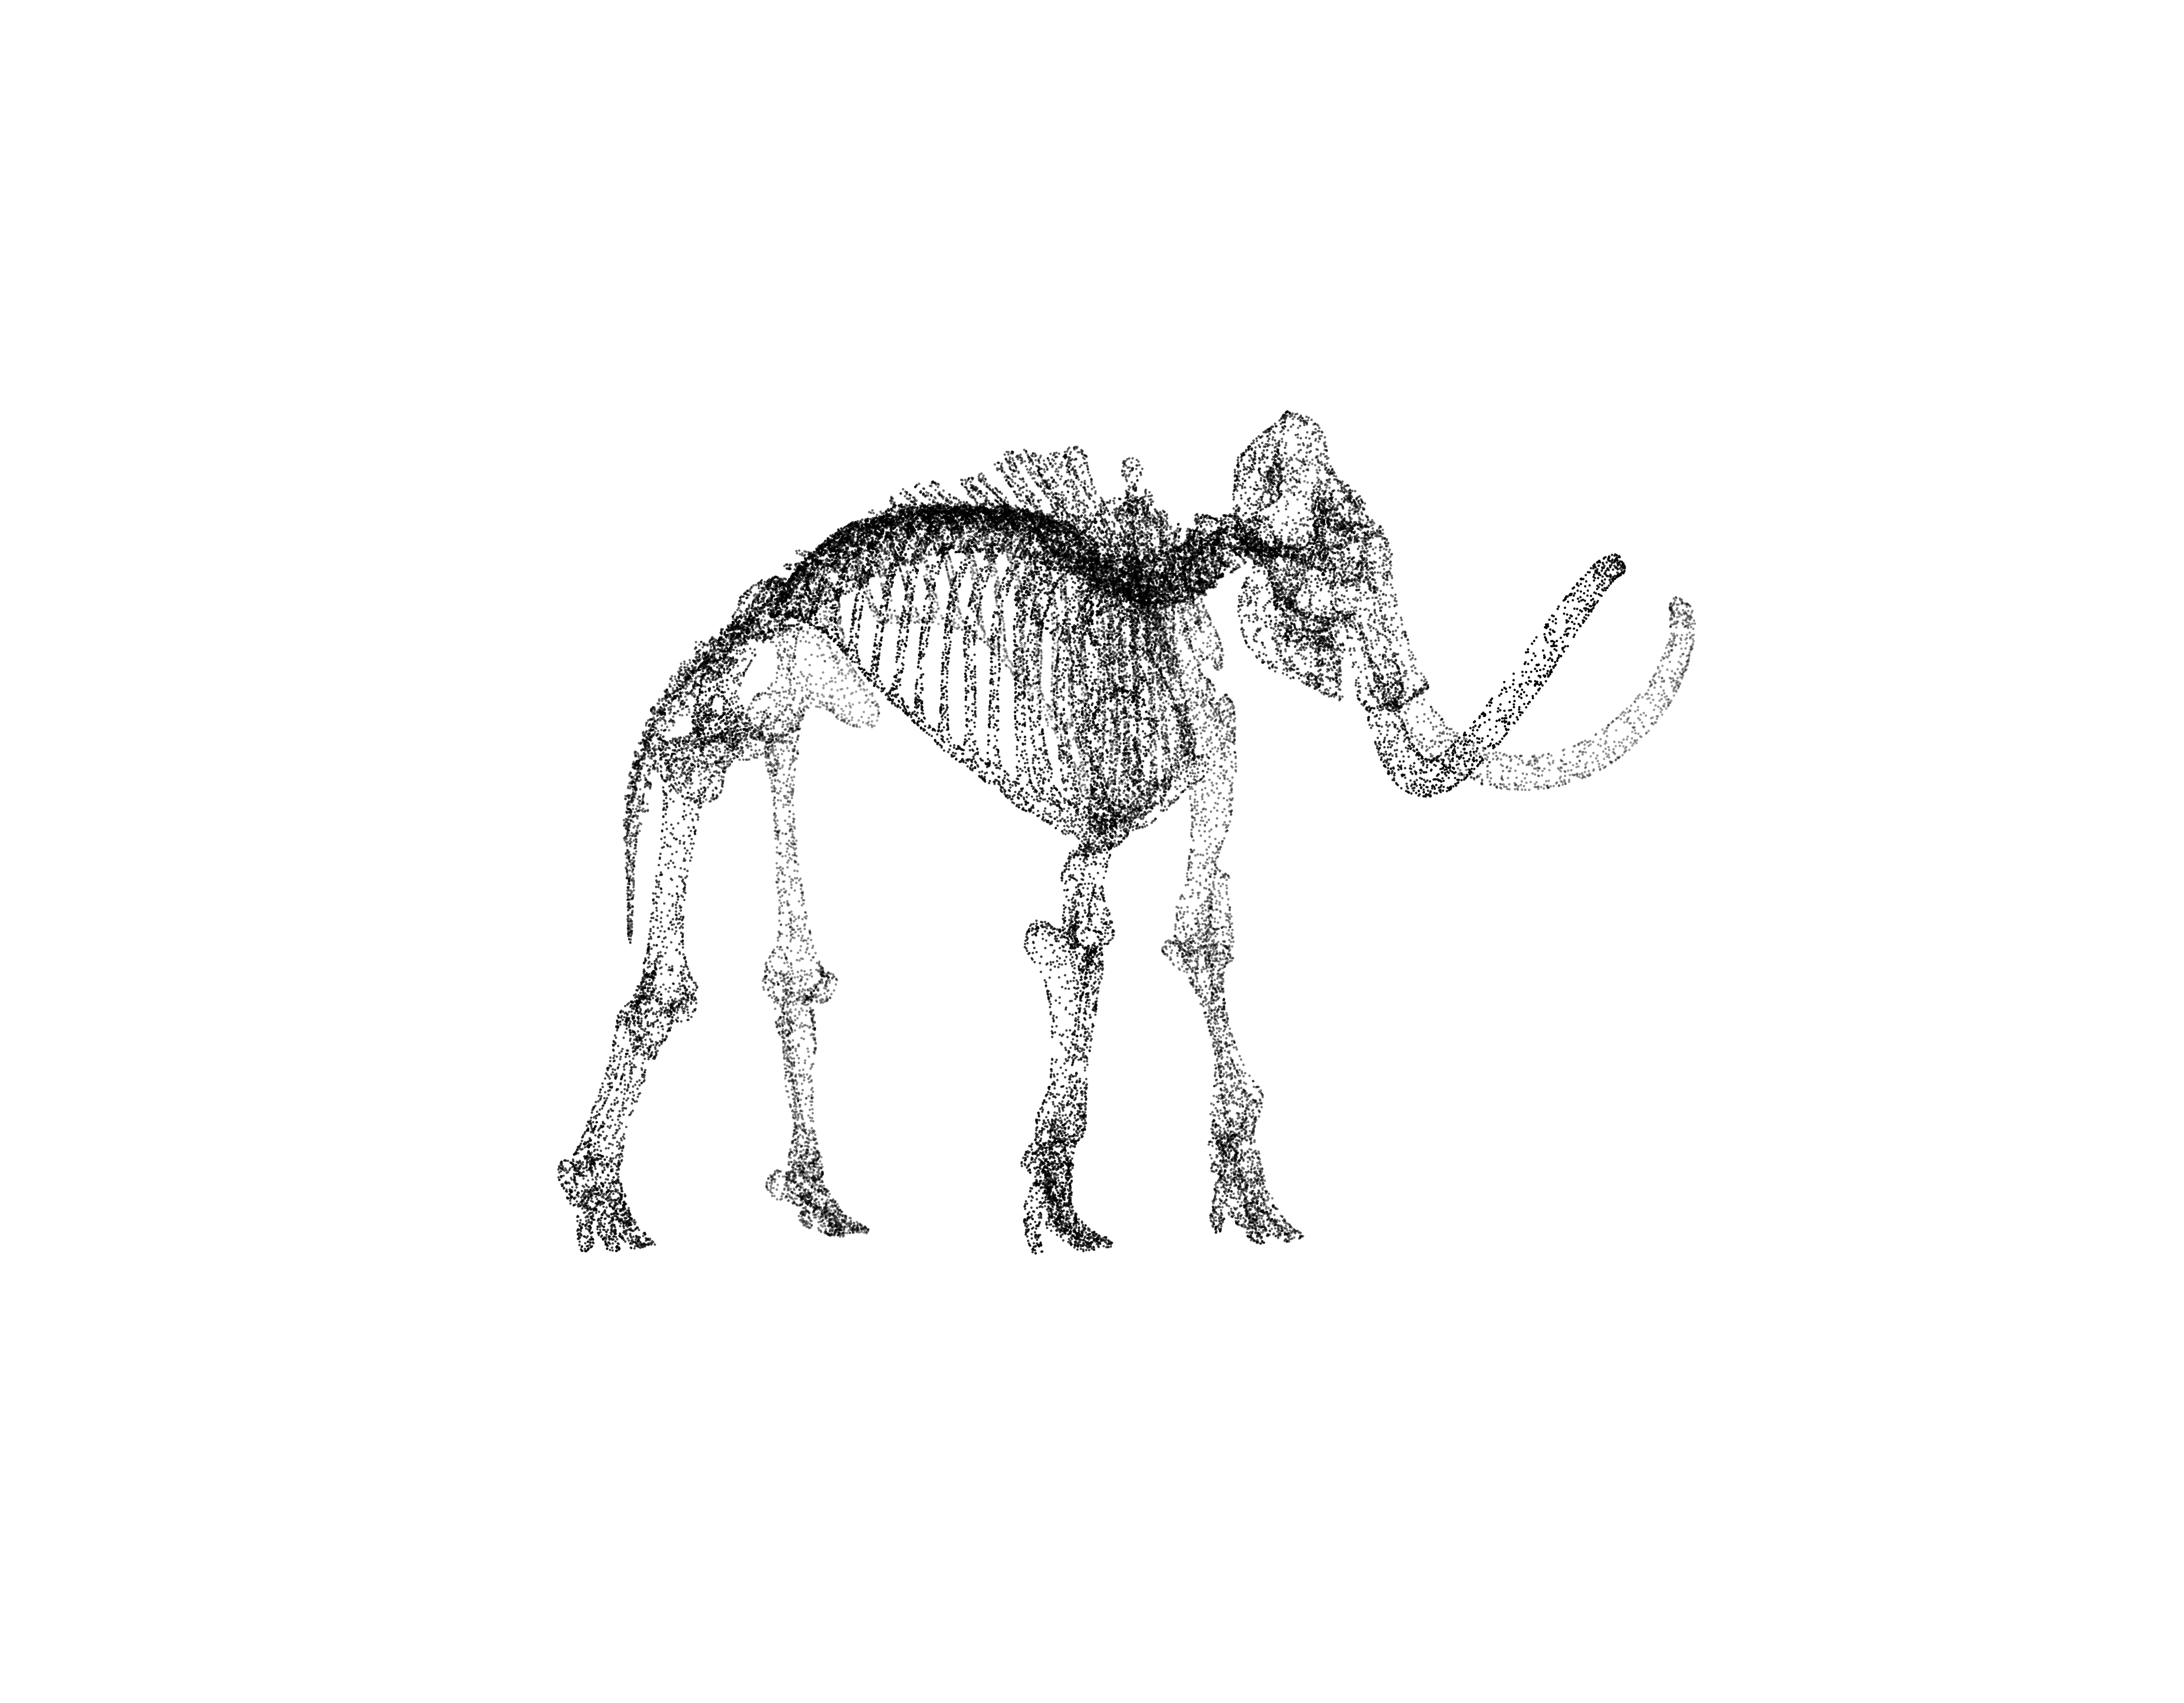

In [4]:
#plot the mammoth
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(90,72))

ax = fig.add_subplot(111, projection='3d')
# ax.set_aspect('equal')

ax.set_axis_off()
ax.scatter(mammoth['x'], mammoth['y'], mammoth['z'], s=20,c='black')
ax.view_init(0, -170)

plt.show()

# UMAP the mammoth

In [5]:

reducer = umap.UMAP(#random_state=42,
#                     init='random',
                    n_components=2,
                    n_neighbors=300,
                    min_dist=0.1,
#                     spread=2,
                    metric='euclidean',
                    verbose=True)

reducer.fit(mammoth)


UMAP(a=None, angular_rp_forest=False, b=None,
   force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
   local_connectivity=1.0, metric='euclidean', metric_kwds=None,
   min_dist=0.1, n_components=2, n_epochs=None, n_neighbors=300,
   negative_sample_rate=5, output_metric='euclidean',
   output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
   set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
   target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
   transform_queue_size=4.0, transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Tue Sep 10 22:11:41 2019 Finding Nearest Neighbors
Tue Sep 10 22:11:41 2019 Building RP forest with 16 trees
Tue Sep 10 22:11:43 2019 NN descent for 16 iterations
Tue Sep 10 22:13:14 2019 Finished Nearest Neighbor Search
Tue Sep 10 22:13:43 2019 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	complete

UMAP(a=None, angular_rp_forest=False, b=None,
   force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
   local_connectivity=1.0, metric='euclidean', metric_kwds=None,
   min_dist=0.1, n_components=2, n_epochs=None, n_neighbors=300,
   negative_sample_rate=5, output_metric='euclidean',
   output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
   set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
   target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
   transform_queue_size=4.0, transform_seed=42, verbose=True)

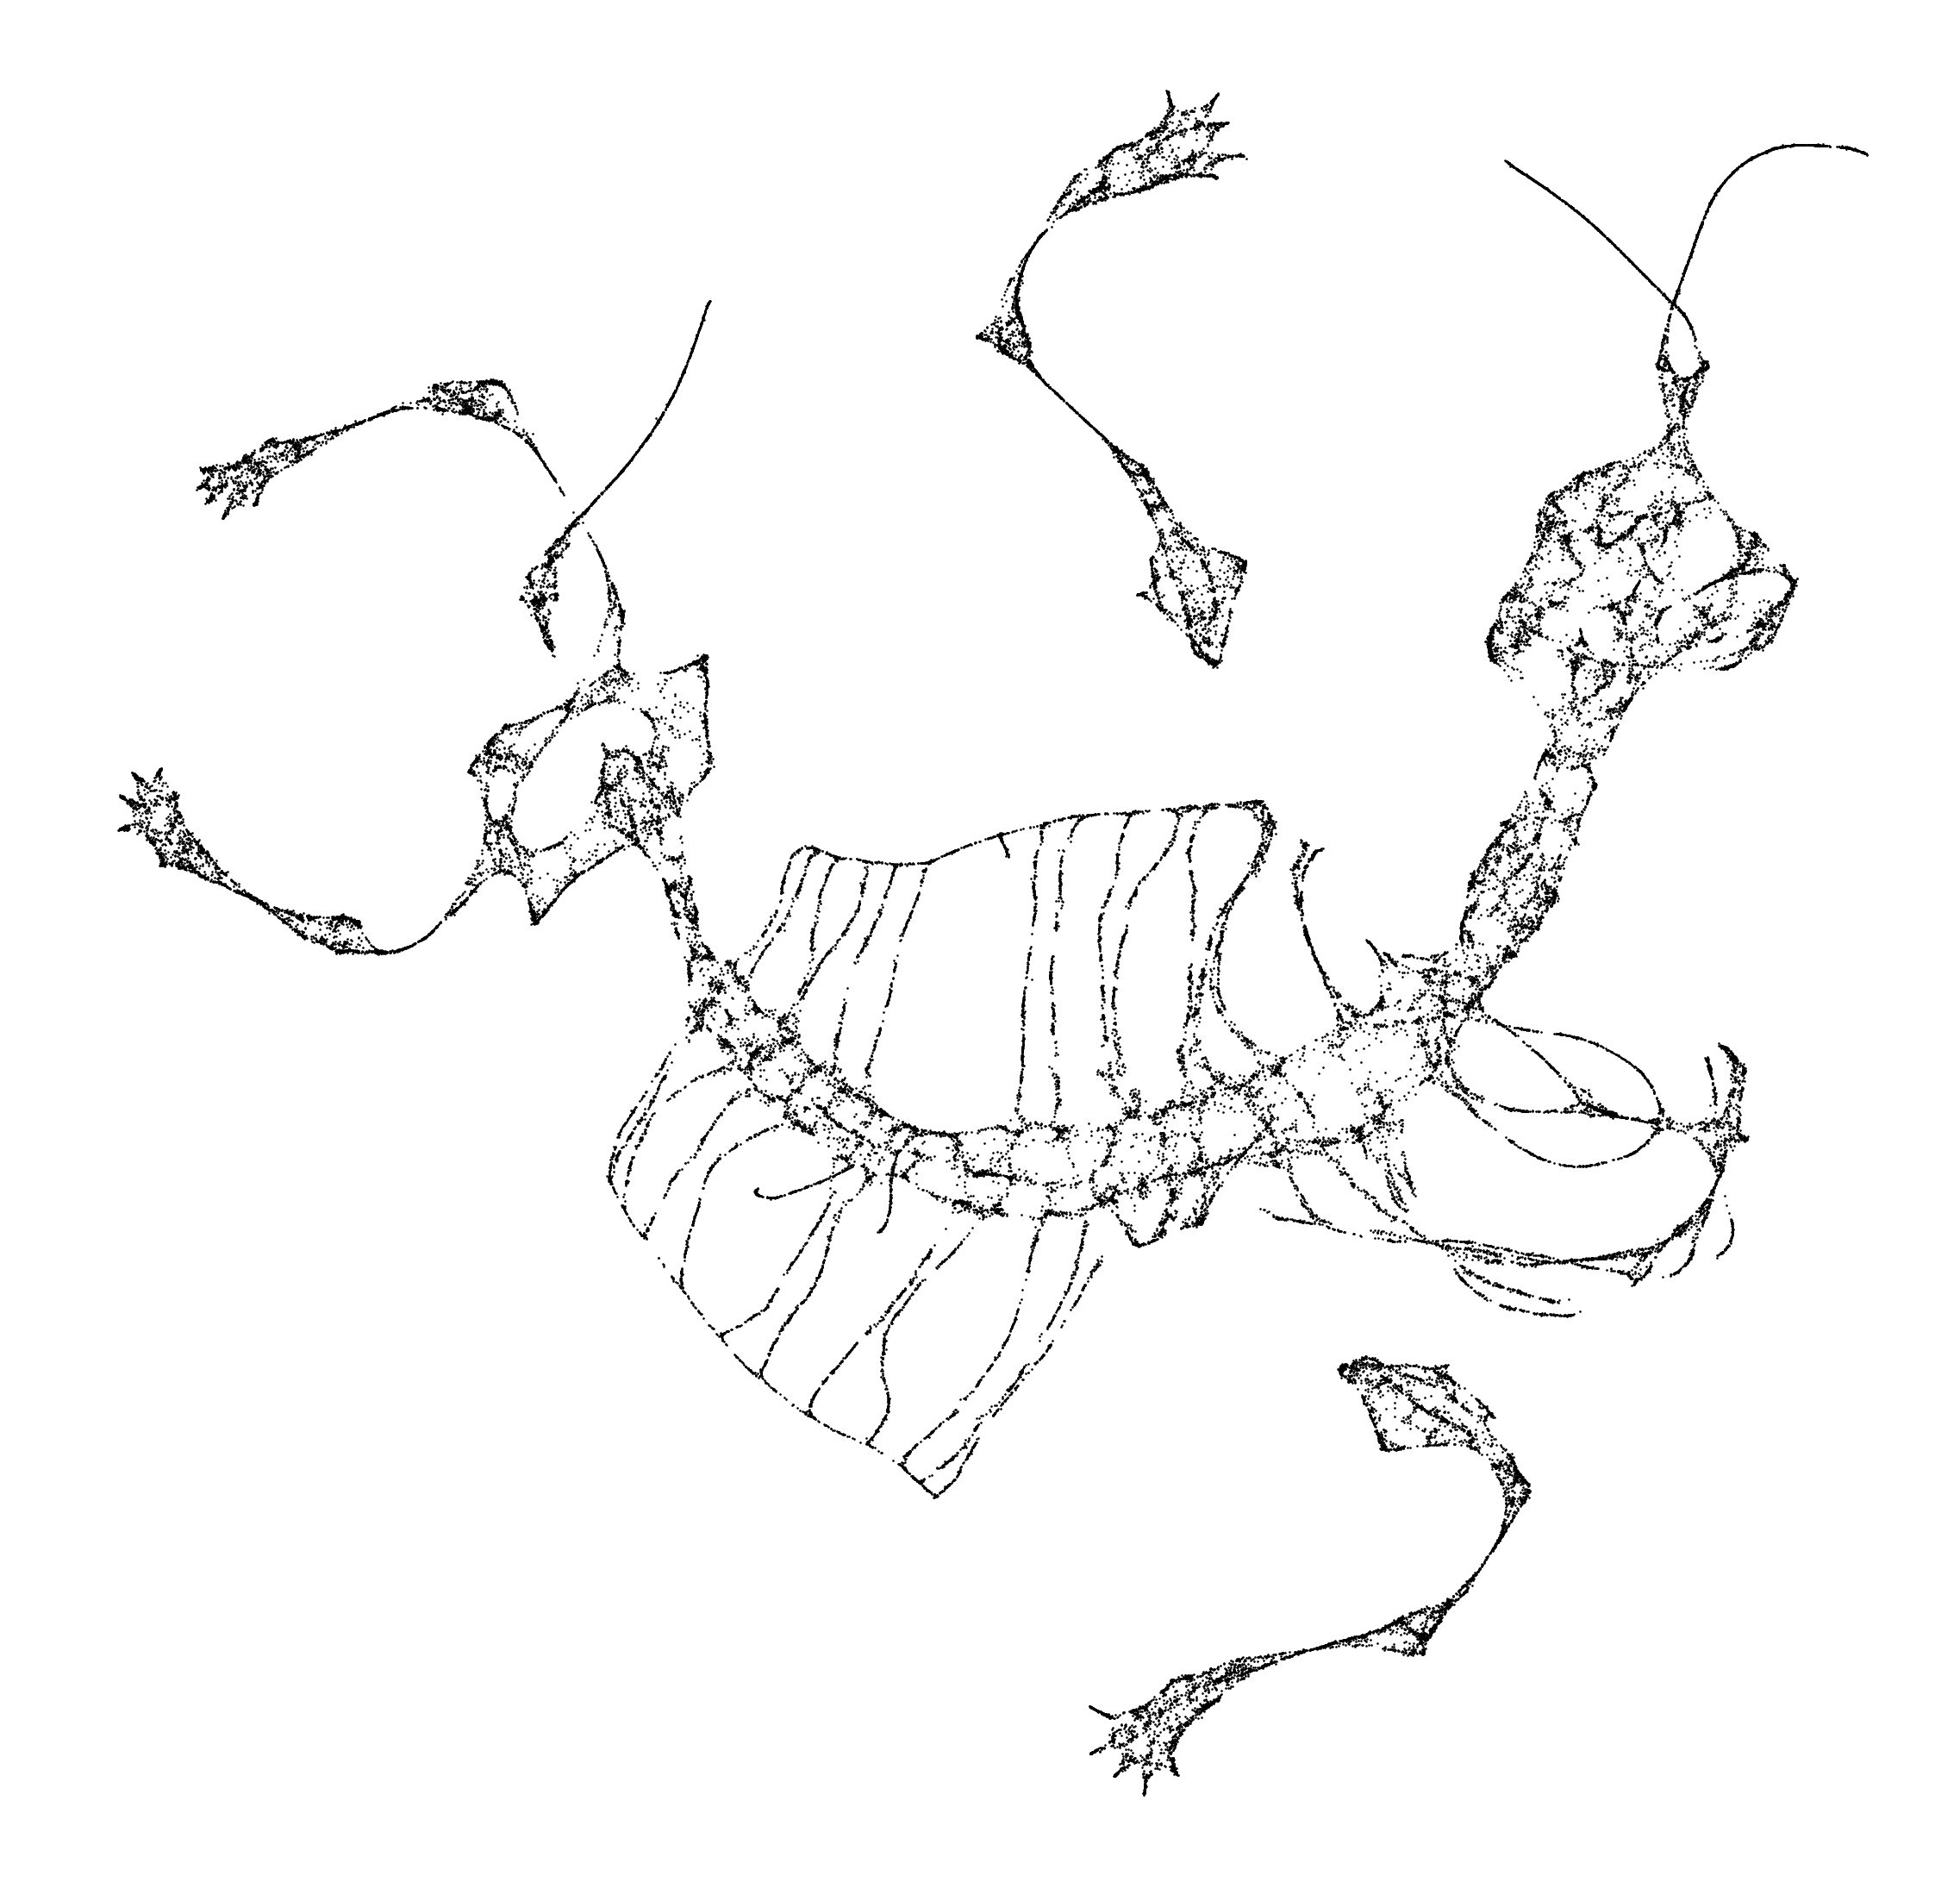

In [6]:
plt.figure(figsize=(40,40),facecolor='w')


# fig, ax = plt.subplots(facecolor='w')
plt.axis('off')
plt.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1], s=2.5,c='black')


#     ax = plt.Axes(fig, [0., 0., 1., 1.])
#     ax.set_axis_off()

# Cluster for colors

In [8]:
# Perform agglomerative clustering on a subset, then scale up with a classifier. Courtesy sb. on StackOverflow. 
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=12).fit(mammoth)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = \
    train_test_split(mammoth, mammoth, 
                     test_size=45000, random_state=42) 
AC = AgglomerativeClustering(n_clusters=11, linkage='ward')
AC.fit(X_train)
labels = AC.labels_

KN = KNeighborsClassifier(n_neighbors=10)
KN.fit(X_train,labels)
labels2 = KN.predict(mammoth)
col_len = len(set(labels2))-1

In [9]:
%%R -i col_len -o color_scale

mycolors <- c('#cc0011', '#002244', '#dddd33', '#004488', '#003311', '#11aaaa','#2E6697', '#9B2006')
# c('#2E6697', '#9B2006', '#D23310', '#C23E45', '#928151', '#C35E03', '#43A209', '#CA5A4E', '#61A801', '#269B11', '#ED9A1A', '#854154', '#575377', '#A71A83', '#3366CC', '#9B1109', '#605295', '#6636C6', '#0C8BB9', '#66873A', '#1395B5', '#EB9C01', '#218E17', '#7B5891', '#B6220C', '#B42F30', '#8E3F5F', '#665F80', '#AD4E13', '#B17B2D', '#1D78A8', '#DD6511', '#AAAA11', '#676E15', '#A8167A', '#628871')
pal <- colorRampPalette(sample(mycolors))
color_scale <- sample(pal(col_len))
color_scale <- c(color_scale)#c("#CDCDCD"),

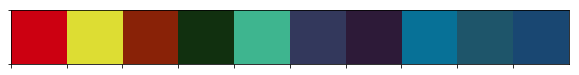

In [10]:
cmap = mpl.colors.ListedColormap(list(color_scale))
sns.palplot (color_scale)

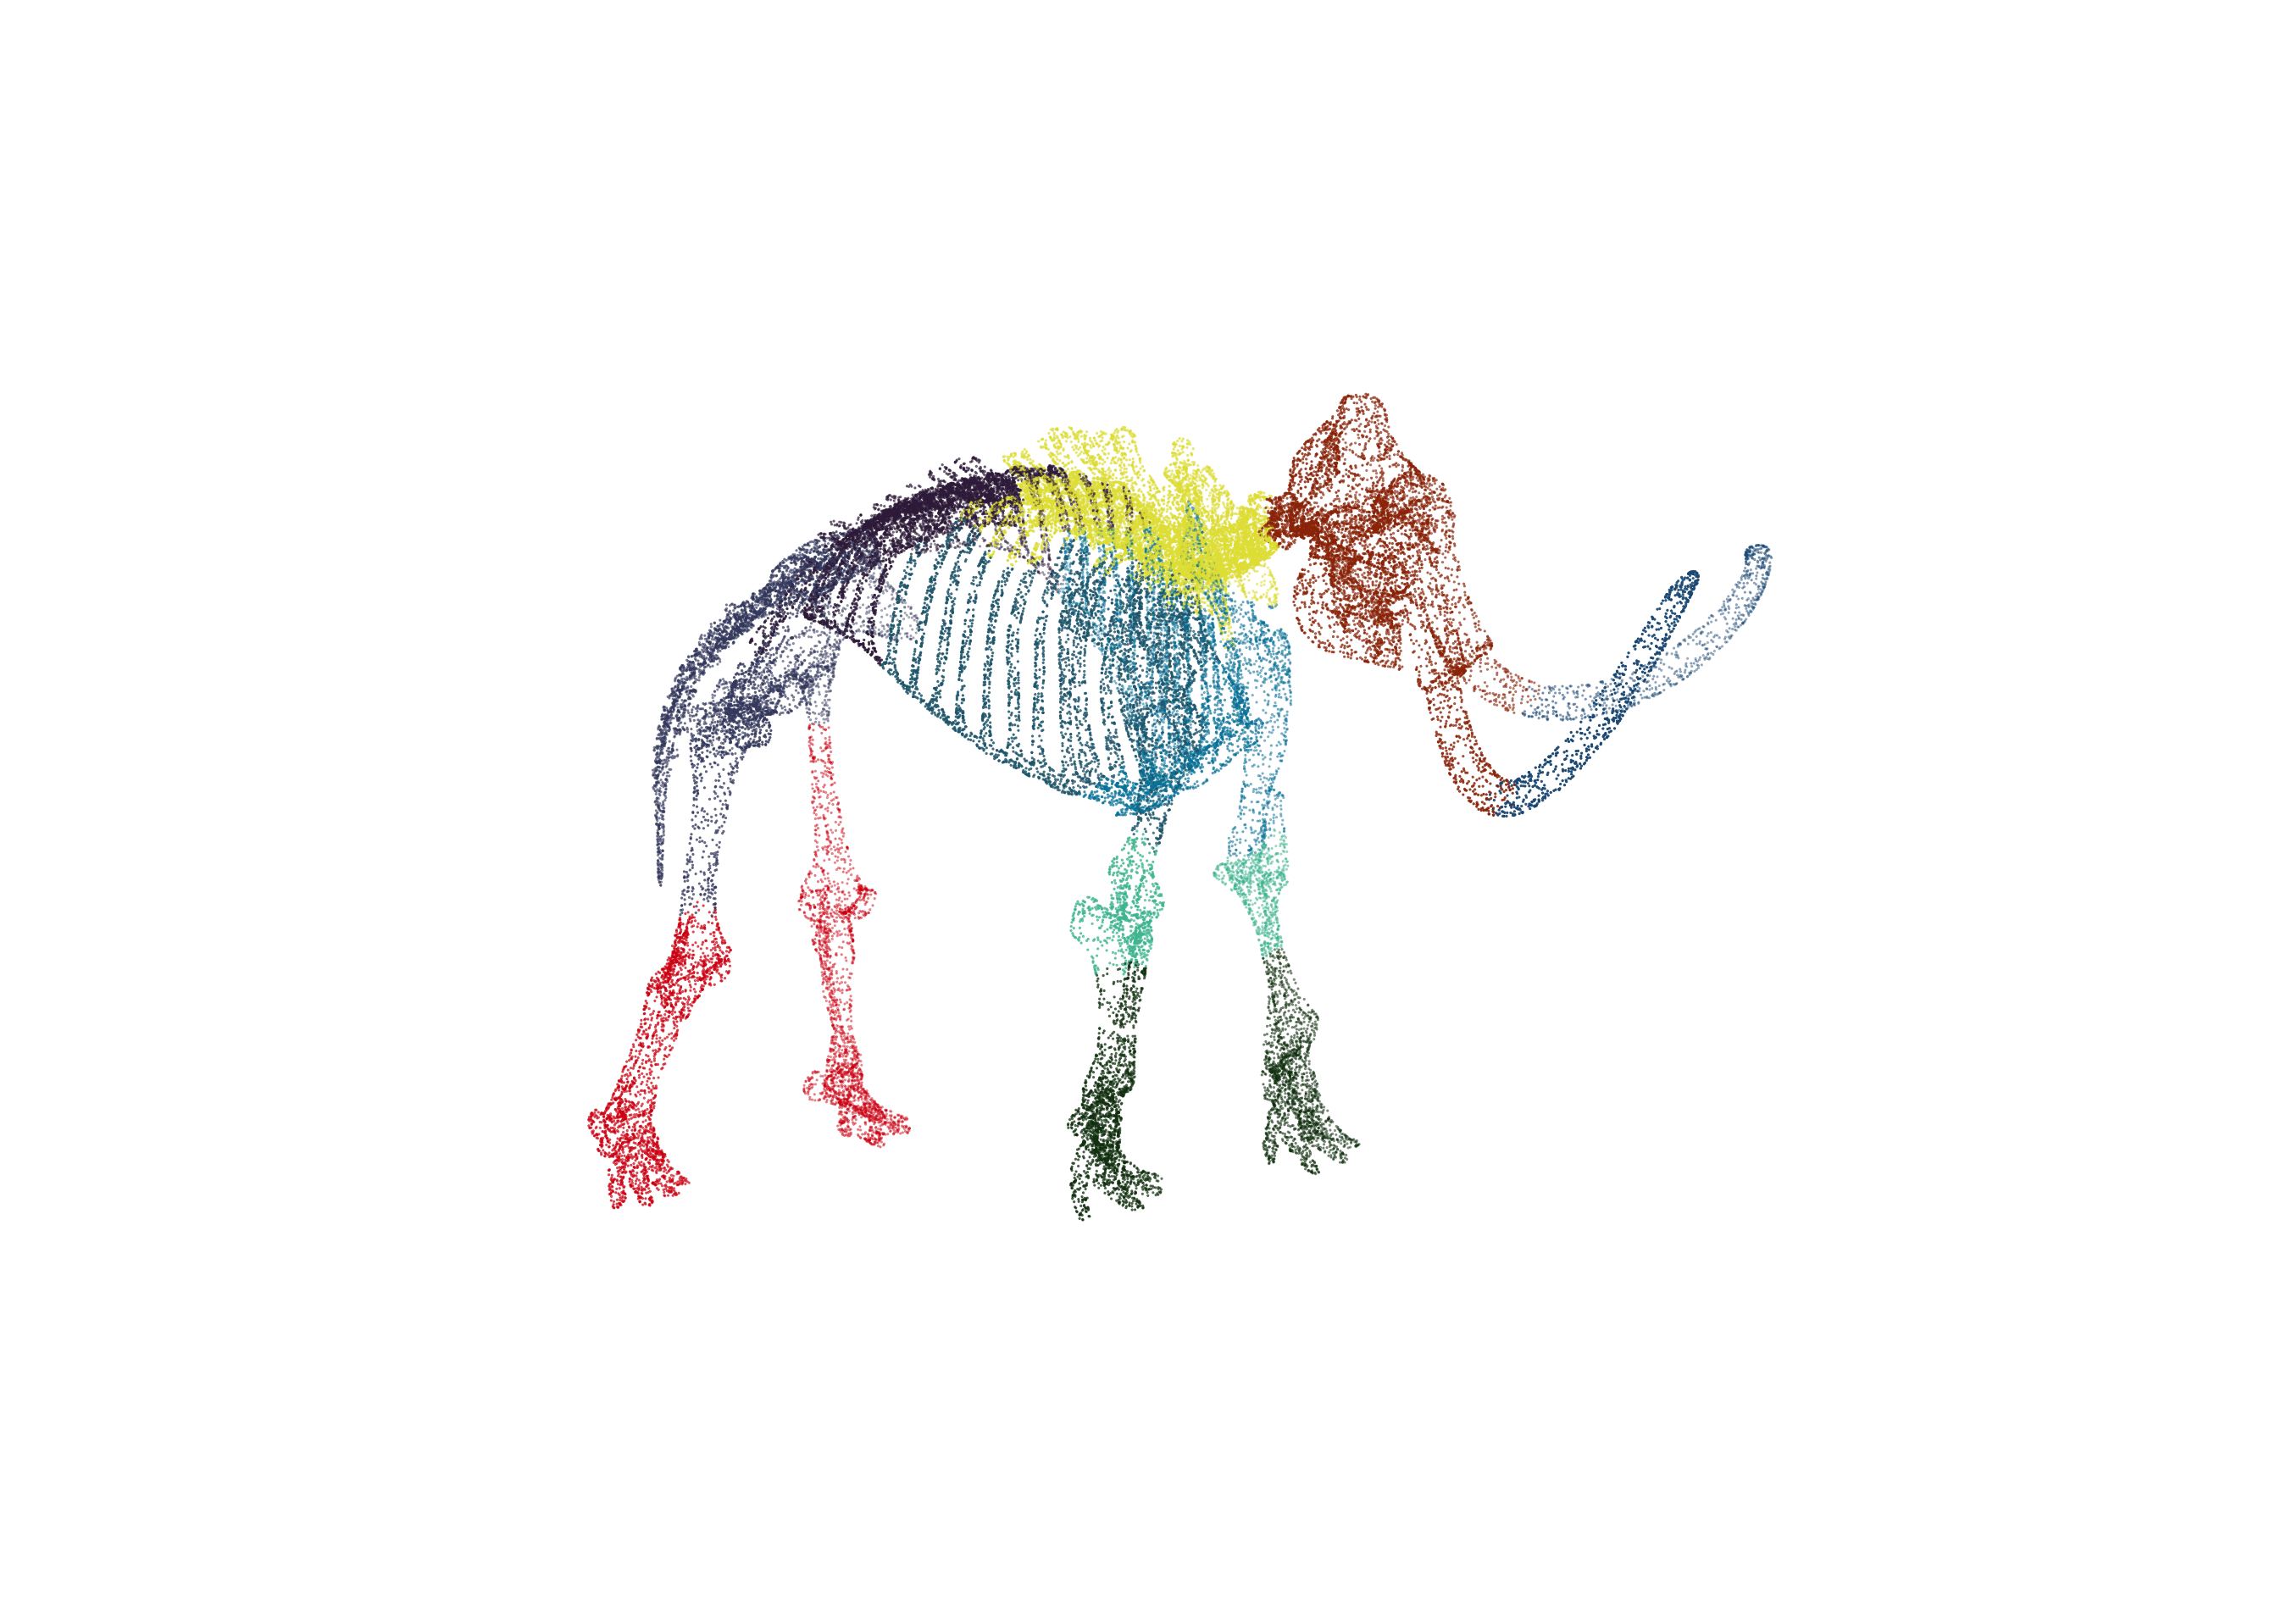

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(48,35))

ax = fig.add_subplot(111, projection='3d')
# ax.set_aspect('equal')

ax.set_axis_off()
ax.scatter(mammoth['x'], mammoth['y'], mammoth['z'], s=5,c=labels2,cmap=cmap)
ax.view_init(10, -170)

plt.show()

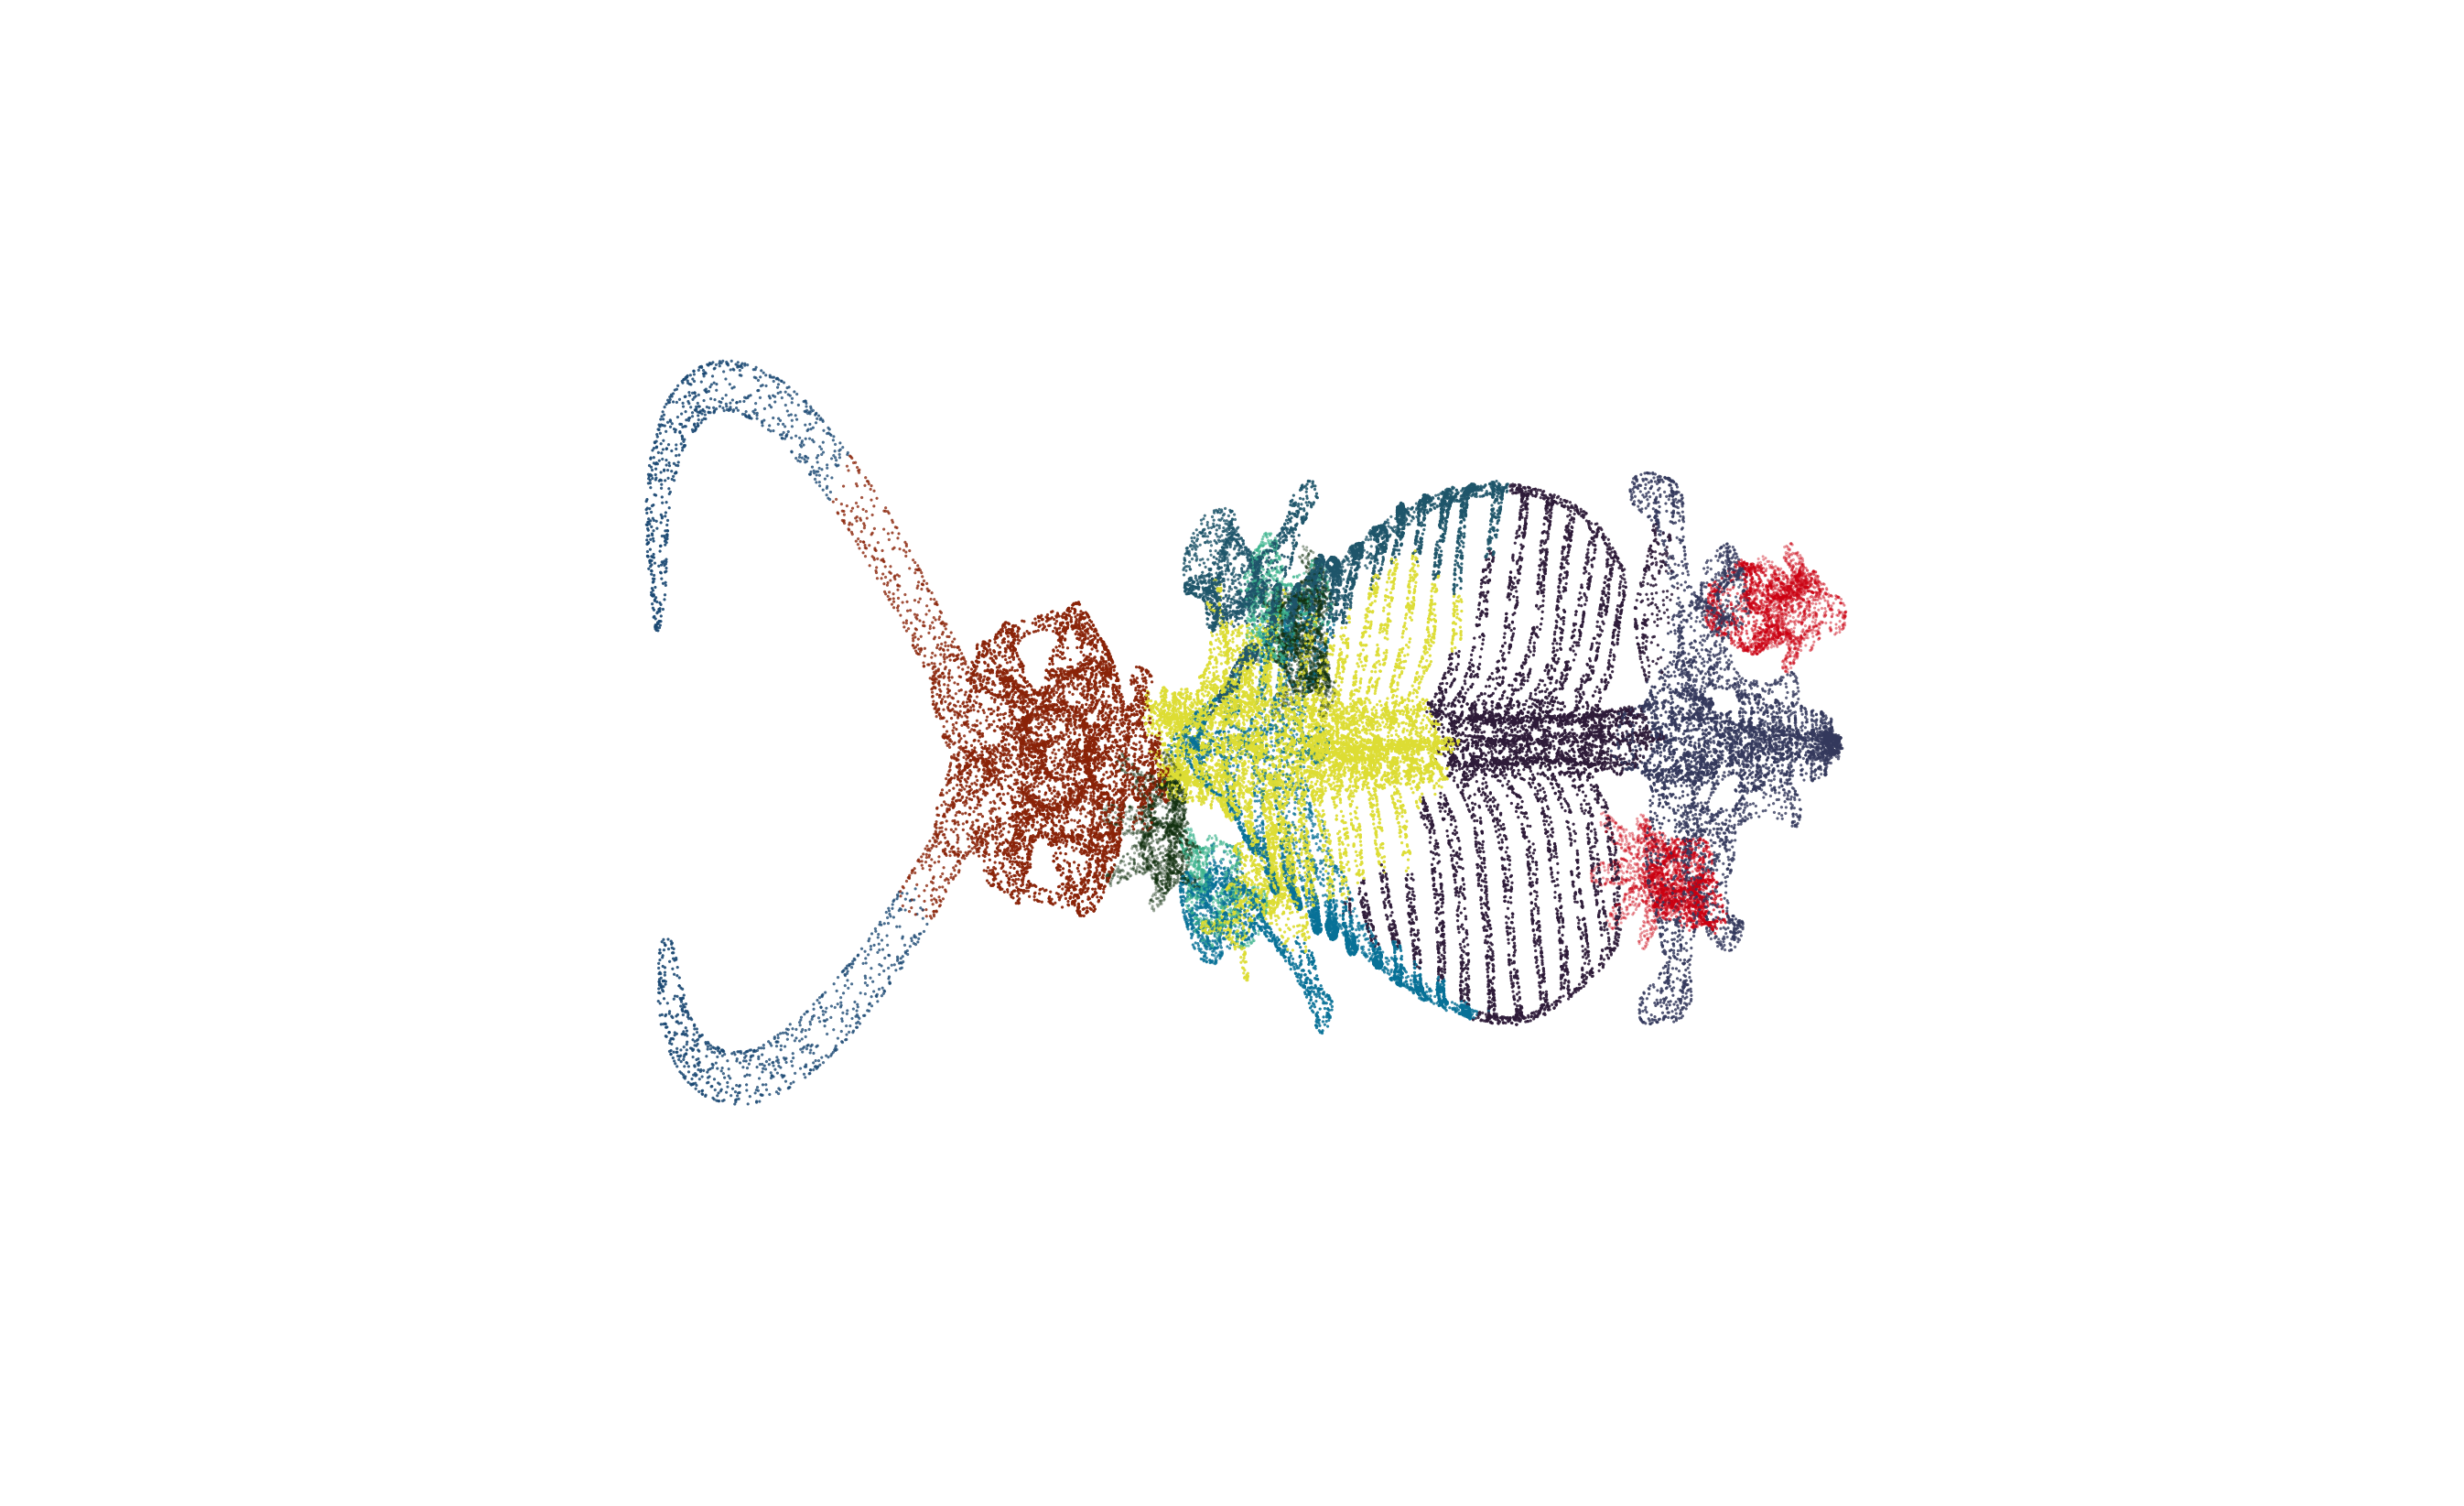

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(48,30))

ax = fig.add_subplot(111, projection='3d')
# ax.set_aspect('equal')

ax.set_axis_off()
ax.scatter(mammoth['x'], mammoth['y'], mammoth['z'], s=5,c=labels2,cmap=cmap)
ax.view_init(90, 0)

plt.show()

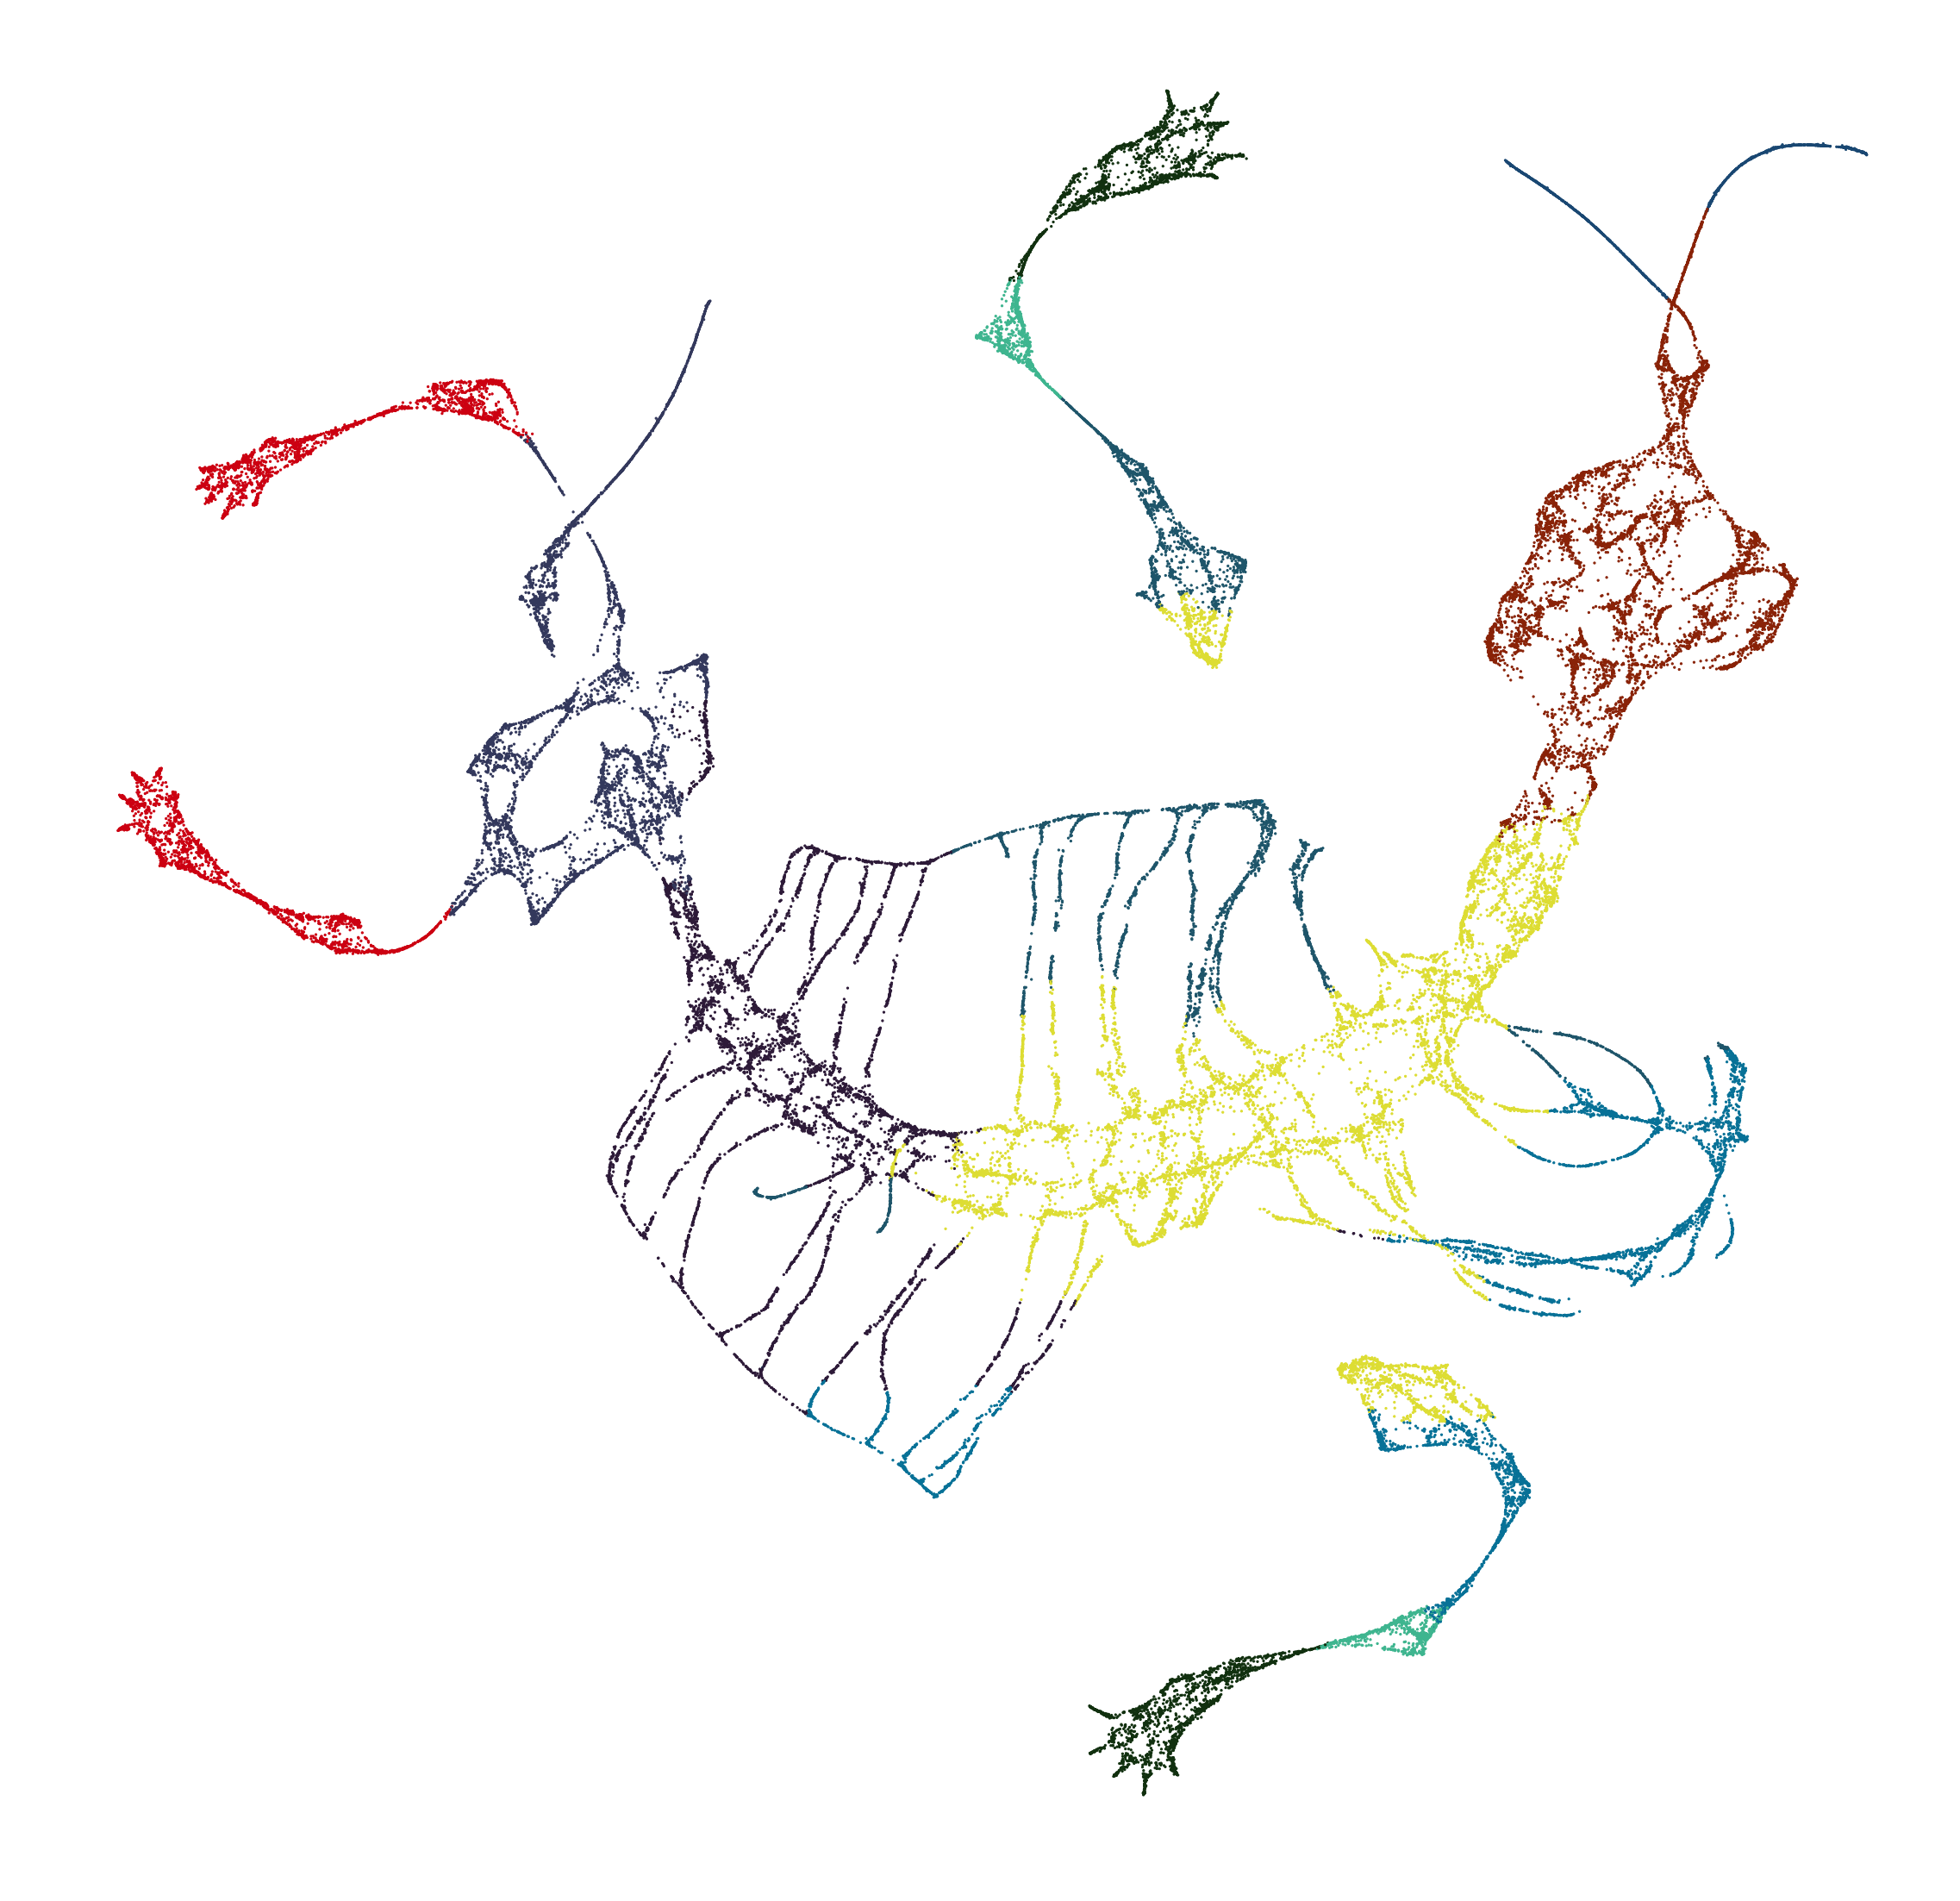

In [14]:
plt.figure(figsize=(40,40),facecolor='w')

plt.axis('off')
plt.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1], s=5,c=labels2,cmap=cmap)


# Changing n_neighbours
Loop over several values of *n_neighbours* and always use the previous embedding as the initialization of the new one instead of a spectral embedding. Slightly reduce the learning rate, so that this works nicely. 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

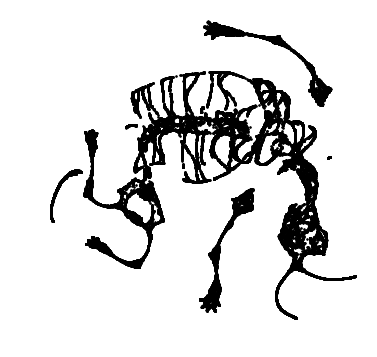

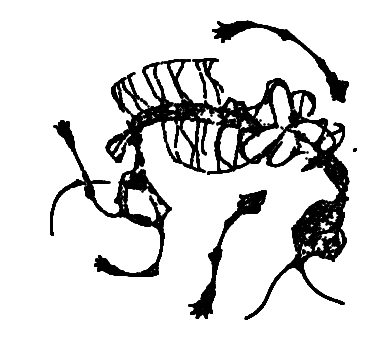

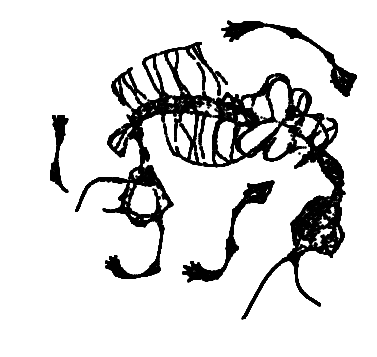

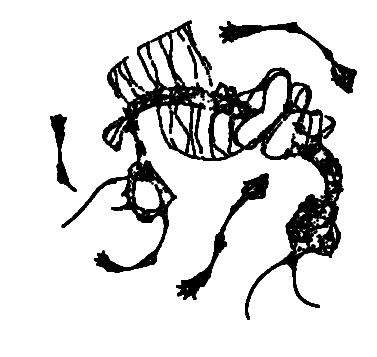

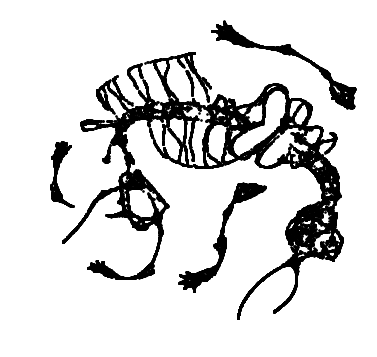

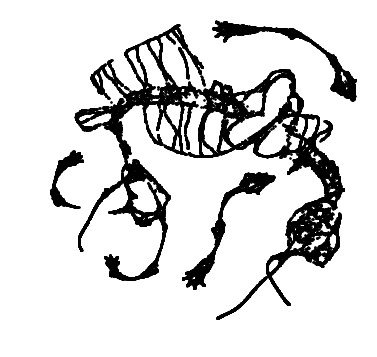

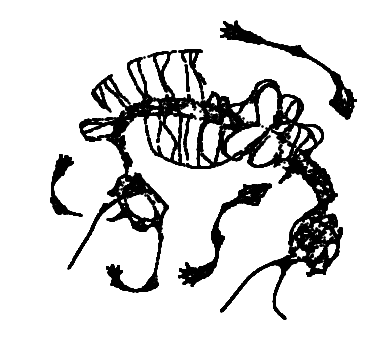

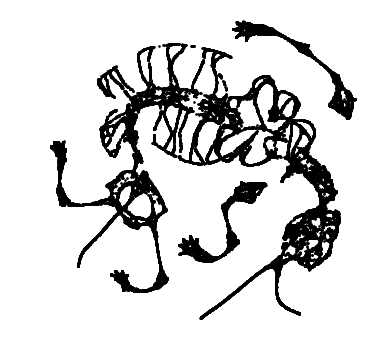

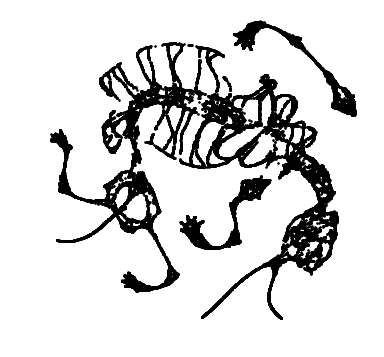

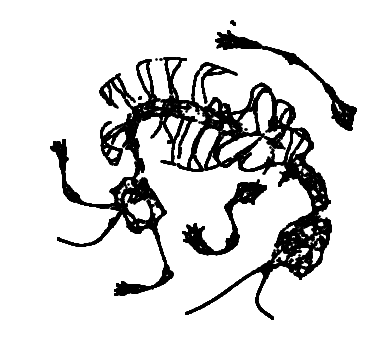

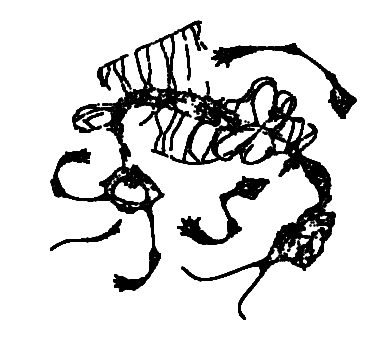

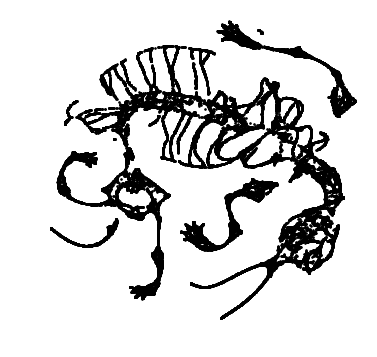

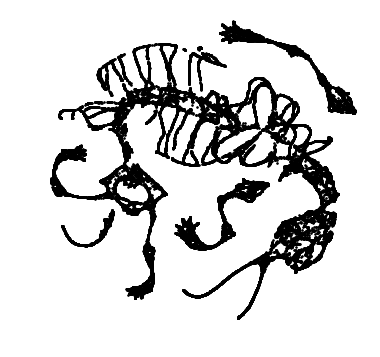

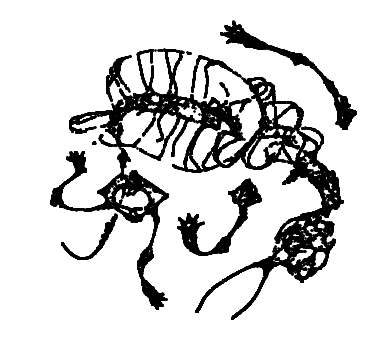

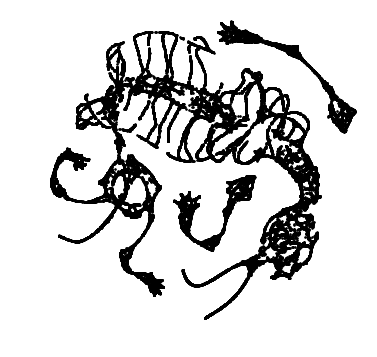

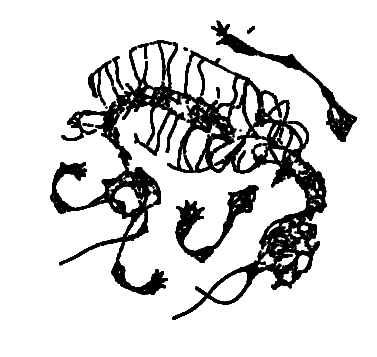

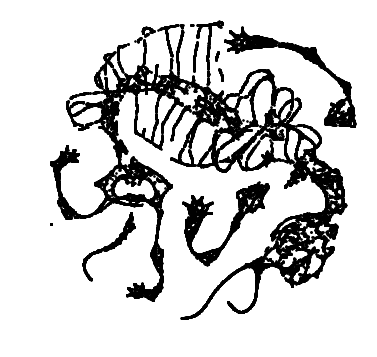

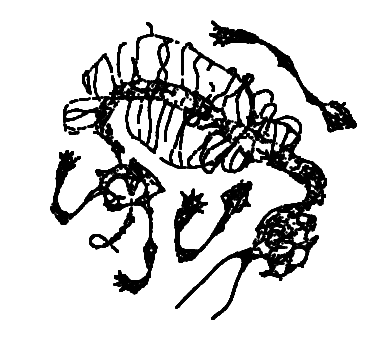

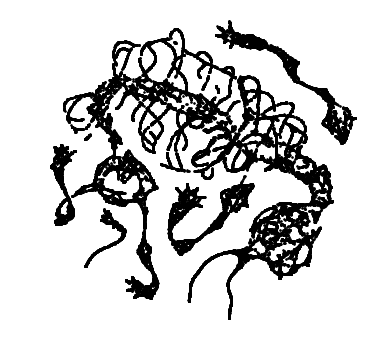

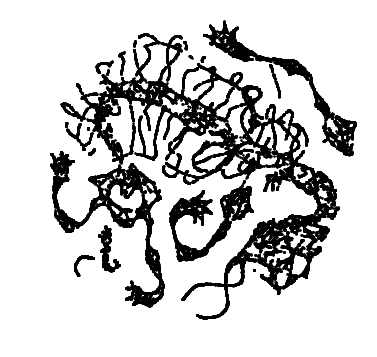

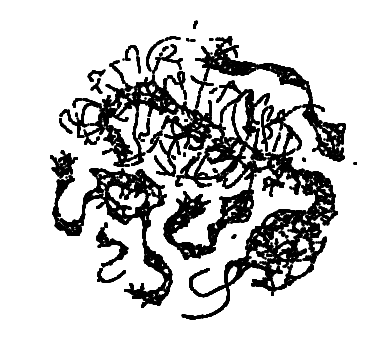

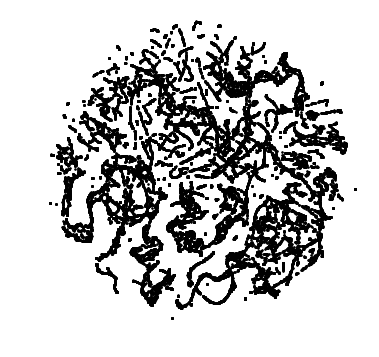

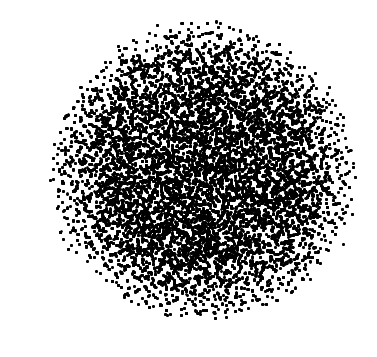

In [7]:
neighbours = list(range(5,120,5))
neighbours.reverse()
first = True
coordinates = []
for n in tqdm_notebook(neighbours):
    #min_dist=0.1,

    if first == True:
        first = False
        reducer = umap.UMAP(n_components=2,n_neighbors=n,
                        metric='euclidean')
        reducer.fit(mammoth)
    else:
        reducer = umap.UMAP(n_components=2,n_neighbors=n,
                        metric='euclidean',learning_rate=0.92,init=embedding)#,learning_rate=0.9
        reducer.fit(mammoth)
    embedding = reducer.embedding_

    plt.figure(figsize=(6,6),facecolor='w')
    plt.axis('off')
    plt.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1], s=2.5,color='black')
    emb = pd.DataFrame(embedding)
    emb.columns = ['x','y']
    emb["n"] = n
    coordinates.append(emb)


In [8]:
coordinates_full_df = pd.concat(coordinates, ignore_index=True)

# Animate using gganimate in R

In [9]:
%%R -i coordinates_full_df
#--width 4900 --height 3200 -r 140 --bg #ffffff
library(hrbrthemes)
library(ggplot2)
library(fields)
library(akima)
library(directlabels)
library(zoo)
library(gridExtra)
library(plotly)

library(ggalt)
library(mgcv)
library(scales)
library(gganimate)
library(gifski)
library(png)

timespan <- length(unique(coordinates_full_df$n))

p <- ggplot(data = coordinates_full_df,aes(x=x,y=y))+#,group=id,color=as.factor(journal)))+#as.factor(id)))+#))+
# geom_point(data=subset(coordinates_full_df, cluster == -1), aes(x=x, y=y),pch=16,cex=1.5,alpha=0.2, color=myGray)+                      
# geom_point(data=subset(coordinates_full_df, cluster != -1), aes(x=x, y=y,color=as.factor(cluster)),pch=16,cex=1.5,alpha=0.6)+                      

geom_point(size = 0.1, stroke = 0,alpha=1)+

theme_ipsum_rc()+
theme(legend.position = "none")+
labs(x="", y="",
       title="UMAP of a Woolly Mammoth",
#        subtitle="...based on the code by McInnes, Healy (2018)",
       caption="by Maximilian Noichl, UMAP by McInnes, Healy (2018), Mammooth by Smithsonian 3D")+
theme(panel.grid.major = element_line(colour = "grey", linetype="dotted", size=0.55),panel.grid.minor = element_blank())+
# theme(plot.background = element_rect(fill = "#fbf8f1"))+

  transition_states(n) +
  ease_aes('sine-in-out', interval = 0.01)+#,enter_length = 0.002,exit_length = 0.002)+,nframes = 1000
enter_appear(early = FALSE)+
#  enter_fade()+
#    exit_fade()+
exit_disappear(early = TRUE)+
labs(subtitle = "Embedding for n_neighbours = {closest_state}")

# p <- p + 
#   transition_time(year,transition_length = 4,state_length = 0)+
#   labs(title = "Year: {frame_time}")
p <-animate(p, 
        duration = timespan,#s/100, # = 365 days/yr x 3 years x 0.25 sec/day = 274 seconds
        fps  =  28,width=1000,height=1000)#,nframes = [...or pick it here])



p
anim_save('anim_nearest_neighbours.gif', animation = p)


C:\ProgramData\Anaconda3\lib\site-packages\rpy2-2.9.4-py3.7-win-amd64.egg\rpy2\robjects\pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


# Repeat for min_dists

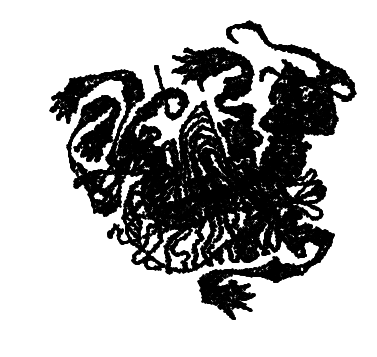

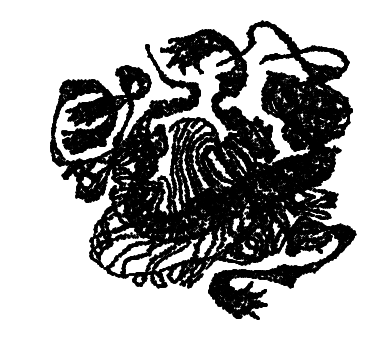

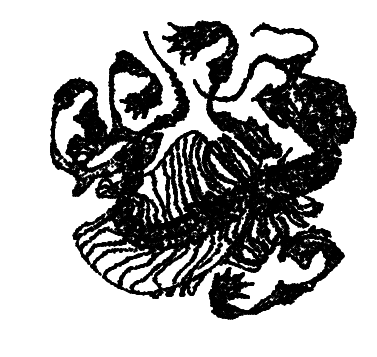

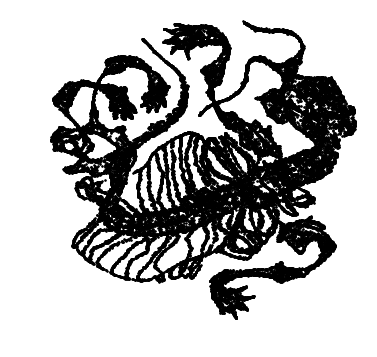

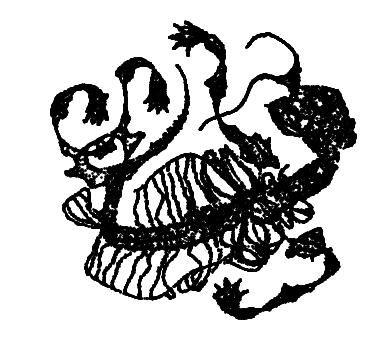

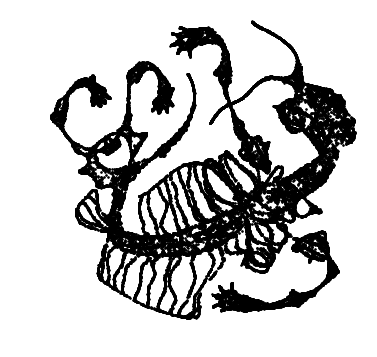

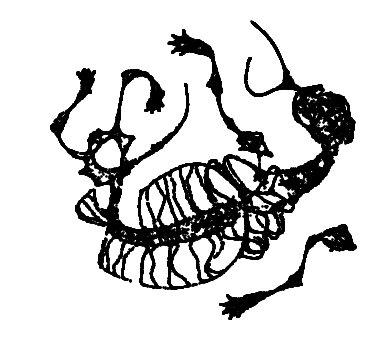

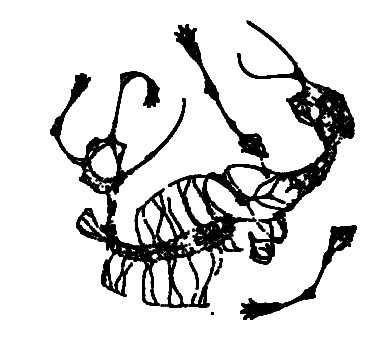

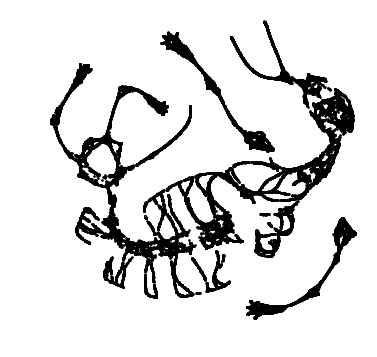

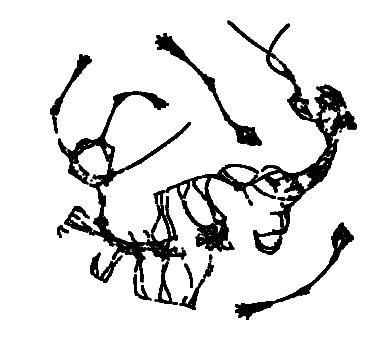

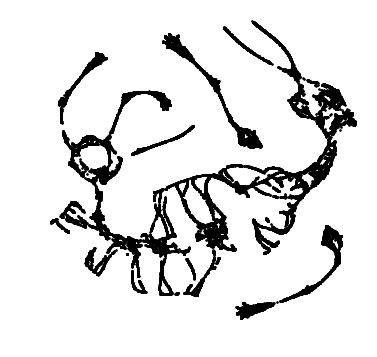

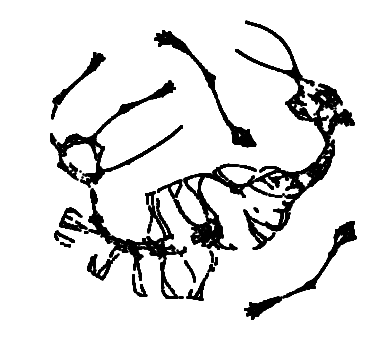

In [10]:
min_dists = [0.001,0.005,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
min_dists.reverse()
min_dists
first = True
coordinates = []
for d in tqdm_notebook(min_dists):
    #min_dist=0.1,

    if first == True:
        first = False
        reducer = umap.UMAP(n_components=2,n_neighbors=100,min_dist=d,
                        metric='euclidean')
        reducer.fit(mammoth)
    else:
        reducer = umap.UMAP(n_components=2,n_neighbors=100,min_dist=d,
                        metric='euclidean',learning_rate=0.9,init=embedding)#,learning_rate=0.9
        reducer.fit(mammoth)
    embedding = reducer.embedding_

    plt.figure(figsize=(6,6),facecolor='w')
    plt.axis('off')
    plt.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1], s=2.5,color='black')
    emb = pd.DataFrame(embedding)
    emb.columns = ['x','y']
    emb["d"] = d
    coordinates.append(emb)

In [11]:
coordinates_full_df = pd.concat(coordinates, ignore_index=True)

In [12]:
%%R -i coordinates_full_df
#--width 4900 --height 3200 -r 140 --bg #ffffff
library(hrbrthemes)
library(ggplot2)
library(fields)
library(akima)
library(directlabels)
library(zoo)
library(gridExtra)
library(plotly)

library(ggalt)
library(mgcv)
library(scales)
library(gganimate)
library(gifski)
library(png)

timespan <- length(unique(coordinates_full_df$d))

p <- ggplot(data = coordinates_full_df,aes(x=x,y=y))+#,group=id,color=as.factor(journal)))+#as.factor(id)))+#))+
# geom_point(data=subset(coordinates_full_df, cluster == -1), aes(x=x, y=y),pch=16,cex=1.5,alpha=0.2, color=myGray)+                      
# geom_point(data=subset(coordinates_full_df, cluster != -1), aes(x=x, y=y,color=as.factor(cluster)),pch=16,cex=1.5,alpha=0.6)+                      

geom_point(size = 0.1, stroke = 0,alpha=1)+

theme_ipsum_rc()+
theme(legend.position = "none")+
labs(x="", y="",
       title="UMAP of a Woolly Mammoth",
#        subtitle="...based on the code by McInnes, Healy (2018)",
       caption="by Maximilian Noichl, UMAP by McInnes, Healy (2018), Mammooth by Smithsonian 3D")+
theme(panel.grid.major = element_line(colour = "grey", linetype="dotted", size=0.55),panel.grid.minor = element_blank())+
# theme(plot.background = element_rect(fill = "#fbf8f1"))+

  transition_states(d) +
  ease_aes('sine-in-out', interval = 0.01)+#,enter_length = 0.002,exit_length = 0.002)+,nframes = 1000
enter_appear(early = FALSE)+
#  enter_fade()+
#    exit_fade()+
exit_disappear(early = TRUE)+
labs(subtitle = "Embedding for min_dist = {closest_state}")

# p <- p + 
#   transition_time(year,transition_length = 4,state_length = 0)+
#   labs(title = "Year: {frame_time}")
p <-animate(p, 
        duration = timespan,#s/100, # = 365 days/yr x 3 years x 0.25 sec/day = 274 seconds
        fps  =  28,width=1000,height=1000)#,nframes = [...or pick it here])



p
anim_save('anim_min_dist_param.gif', animation = p)

C:\ProgramData\Anaconda3\lib\site-packages\rpy2-2.9.4-py3.7-win-amd64.egg\rpy2\robjects\pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)
